# Author : Bobby Kawade


# Task 1 : Prediction using Supervised ML

(Level - Beginner)

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Importing Dataset

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data is Imported Successfully")

Data is Imported Successfully


In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


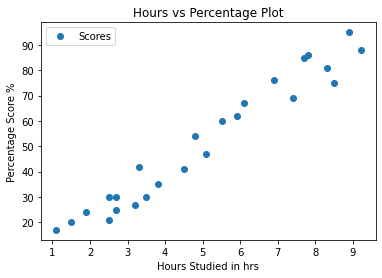

In [17]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage Plot')  
plt.xlabel('Hours Studied in hrs')  
plt.ylabel('Percentage Score %')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Data Preprocessing

In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the Dataset into Training Set and Test Set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Linear Regression Model on Training Set

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


# Plotting the Best Fitted Line

In [23]:
line = regressor.coef_*X + regressor.intercept_

# Predicting the Training Result

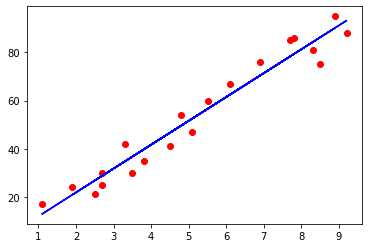

In [27]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

# Predicting the Test set results

In [25]:
y_pred = regressor.predict(X_test)

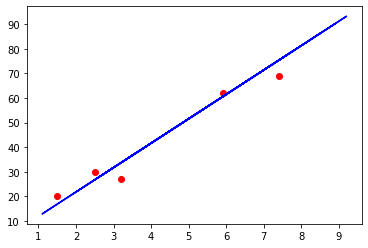

In [26]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

# Making Predictions

In [28]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual result to the Predicted Model result

In [32]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [33]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


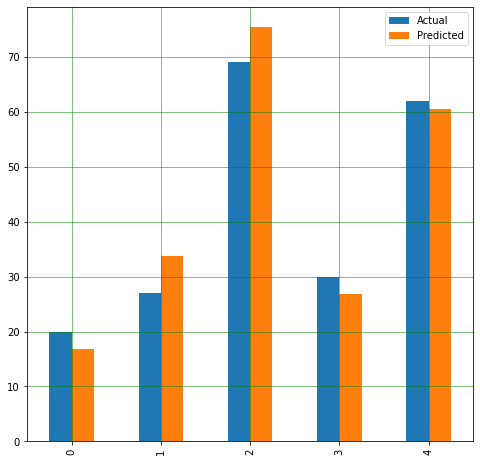

In [39]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='red')
plt.show()

# Evaluating the model

In [40]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


# Question Given : What will be predicted score if a student studies for 9.25 hrs/ day?

### Putting in Equation: y = m * X + C
### where y - Dependent Variable (In our case "Scores")
### X - Independent Variable (In our case "Study Hours")
### m - Slope or Gradient
### C - Intercept

In [48]:
m = regressor.coef_
m

array([9.91065648])

In [49]:
C = regressor.intercept_
C

2.018160041434683

In [50]:
# Putting the Values in Equation y = m * X + C where value of X = 9.25 hrs/day

y_solved = 9.91065648 * 9.25 + 2.018160041434683
y_solved

93.69173248143468

# Conclusion

The Predicted Score if a Student studies for 9.25 hours a day is 93.69173248143468.

# Thank You